<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment5/q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The second objective is to predict the survival rate based on the tumor data provided.
(a) Use a Support Vector Regressor model to predict the survival rate. [Marks: 15]
(b) Report the accuracy and R2 score of the model. [Marks: 10]
(c) Compare and plot the accuracy of the model built with that of a linear regression
model.

In [1]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('./data/problem2/brain_tumor_dataset.csv')


In [2]:
# df = pd.read_csv('./brain_tumor_dataset.csv')
df = df.drop('Patient_ID',axis=1)
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [3]:
binary_cols = ['Gender', 'Radiation_Treatment', 'Surgery_Performed',
                'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required','Tumor_Type']
categorical_cols = ['Location', 'Histology', 'Symptom_1', 'Symptom_2', 'Symptom_3']
numeric_cols = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']
ordinal_cols = ['Stage']

In [4]:
# Create label encoder for binary columns
label_encoder = LabelEncoder()
onehot = OneHotEncoder(sparse_output=False)

ordinal_categories = [['I', 'II', 'III', 'IV']]
ordinal = OrdinalEncoder(categories=ordinal_categories)


# Create a copy of X to avoid modifying the original dataframe
df_encoded = df.copy()

# Encode binary columns using LabelEncoder
for col in binary_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Encode categorical columns using OneHotEncoder

categorical_encoded = onehot.fit_transform(df_encoded[categorical_cols])
categorical_feature_names = onehot.get_feature_names_out(categorical_cols)

# Encode ordinal column (Stage)

df_encoded[ordinal_cols] = ordinal.fit_transform(df_encoded[ordinal_cols])

# Convert categorical encoded array to dataframe
categorical_df = pd.DataFrame(categorical_encoded, columns=categorical_feature_names)

# Drop original categorical columns and concatenate with one-hot encoded columns
df_encoded = df_encoded.drop(columns=categorical_cols)
df_encoded = pd.concat([df_encoded, categorical_df], axis=1)

df_encoded.head()


,Age,Gender,Tumor_Type,Tumor_Size,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,...,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,73,1,1,5.375612,2.0,0,0,0,51.312579,0.111876,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,26,1,0,4.847098,1.0,1,1,1,46.373273,2.165736,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31,1,0,5.588391,0.0,0,0,0,47.072221,1.884228,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,29,1,1,1.436600,3.0,1,0,1,51.853634,1.283342,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,54,0,0,2.417506,0.0,0,0,1,54.708987,2.069477,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X=df_encoded.drop(['Survival_Rate'],axis=1)
y = df_encoded['Survival_Rate']

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()

# Apply the scaler only to the selected columns
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [8]:
# Support Vector Regressor model
svr_model = SVR()
svr_model.fit(X_train_scl, y_train)
svr_predictions = svr_model.predict(X_test_scl)

In [9]:
# Evaluate SVR model
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print(f"Support Vector Regressor - Mean Squared Error: {svr_mse}")
print(f"Support Vector Regressor - R-squared: {svr_r2}")

Support Vector Regressor - Mean Squared Error: 297.97909954099856
Support Vector Regressor - R-squared: -0.010103249015466664


In [11]:
# comparing to Linear Regression Model

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scl, y_train)
lr_predictions = lr_model.predict(X_test_scl)

In [12]:
# Evaluate Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression - Mean Squared Error: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2}")

Linear Regression - Mean Squared Error: 295.77478349729165
Linear Regression - R-squared: -0.0026309571633367224


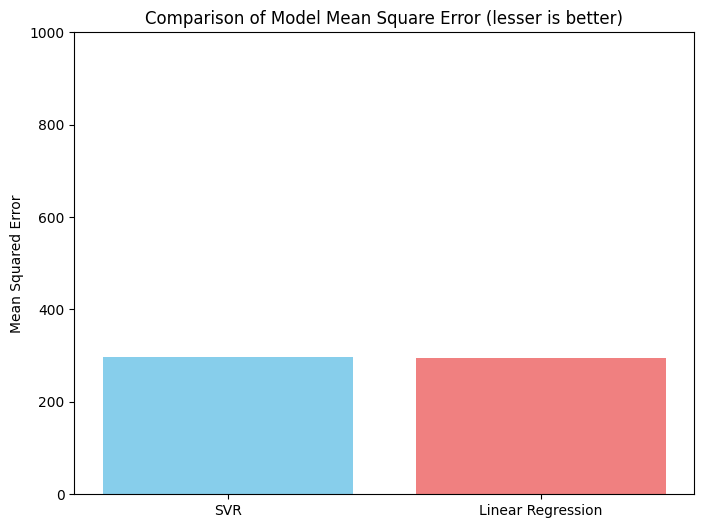

In [21]:
# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(['SVR', 'Linear Regression'], [svr_mse, lr_mse], color=['skyblue', 'lightcoral'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Mean Square Error (lesser is better)')
plt.ylim(0, 1000)
# plt.show()
plt.savefig('ch24m571_Box_plot_MSEComparison.png')

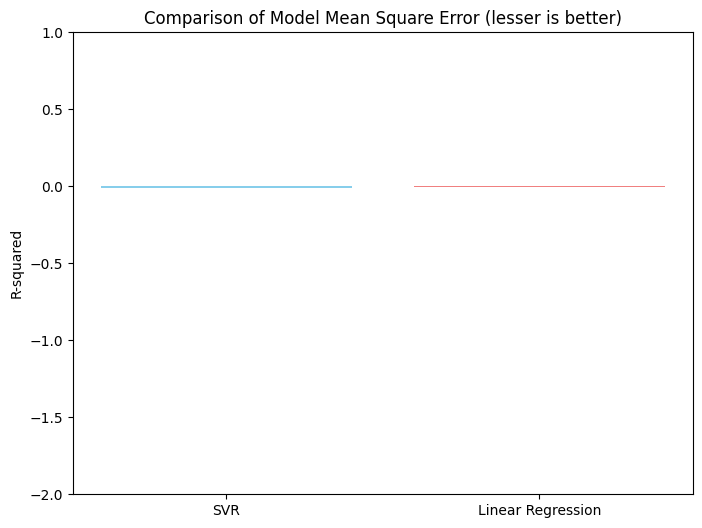

In [18]:
# Plotting the comparison (using R-squared)
plt.figure(figsize=(8, 6))
plt.bar(['SVR', 'Linear Regression'], [svr_r2, lr_r2], color=['skyblue', 'lightcoral'])
plt.ylabel('R-squared')
plt.title('Comparison of Model Mean Square Error (lesser is better)')
plt.ylim(-2 , 1)
# plt.show()
plt.savefig('ch24m571_Box_plot_RegressionComparison.png')

Linear Regression performs marginally better than Support Vector Regressor while having a poor fit